<a href="https://colab.research.google.com/github/KappaDistributive/Practical-Data-Science/blob/develop/Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Data Science 101
by Stefan Mesken.

## Introduction

This is an interactive, introductory course to the field of data science, with strong emphasis on practical applications of machine learning.

## Target Audience

Anyone able to use these notebooks and write some code in Python will be able to benefit from this course.

While our focus lies with this group of beginners, we'll also allow more experienced programmers and data scientist to try their hands on advanced methods.

By the end of this course, you will be able to create and use your own machine learning models. In the procress, you will furthermore 
develop a better understanding of the requirements and challenges that data scientists face in their daily work.


## Syllabus
1. What is Data Science?
2. What is Machine Learning?
3. Examples of Applied Machine Learning

## What is Data Science?

Data Science is a field of study somewhere in the intersection of computer science, mathematics and statistic that aims to leverage scientific methods to extract value from existing data.

As such, it plays a central role in all of our daily lifes. Prominent examples of applied data science include, in no particular order,

- weather forecasts,
- risk assesments of insurance companies,
- personalized advertisements,
- spam filtering,
- travel time estimations (found in most modern navigation systems),
- voice assistants / chatbots,
- sentiment analysis,
- image enhancement,
- recommender systems,
- machine translation,
- advanced driver-assistance systems,
- facial recognition,
- active noise reduction,
- computer-guided diagnostics in medicine, 
- ...

There are also a lot of novel, quite exotic ML models for

- style transfers (e.g. creating new paintings in the style of Van Gogh),
- artificial music composition and text generation,
- creating and detection of 'deep fakes' (for voice, photo and video),
- automated colouring of greyscale images and films,
- creating moving images from pictures,
- ...

In its current form, data science can roughly been divided into the following subcategories:

- Data Mining
- Analytics
- Statistical Methods
- Machine Learning

In this course, we will heavily focus on the last category -- machine learning [1].


[1]: The keen observer may be wondering why the term 'Artificial Intelligence' does not appear on this list.

This is indeed a fair question, given that artificial intelligence is the main buzzword associated with data science in the media. 
However, it is the author's opinion that no reasonable defintion of artificial intelligence has been achieved at the time of this writing and, consequently, that this category doesn't yet exist. If this doesn't seem satisfactory, feel free to use the terms artificial intelligence and machine learning synonymously for the purposes of this course. Though, I'd advise you not to. For more information, see ['On the Measure of Intelligence' by François Chollet](https://arxiv.org/abs/1911.01547).



## What is Machine Learning?

In 1959 Arthur Samuel coined the term Machine Learning to describe the systematic study of algorithms and models that can be adopted ('trained') to complete a specific task without being explicitly told how to do so. As a subcategory of data science, machine learning itself is a collection of related fields:

- Supervised Learning,
- Unsupervised Learning,
- Reinforcement Learning,
- Self Learning,
- Federated Learning,
- ...

Supervised and unsupervised learning are the subjects that we shall focus on. And to begin with that, let's look at a few examples of machine learning models created with these techniques.

## Examples of Applied Machine Learning

### Optical Character Recognition (OCR)

No introductory course in machine learning is complete without a demonstration of optical character recognition, i.e. the translation of images of (handwritten) characters into machine-encoded text.

This task lies in the golden intersections of problems that are very hard to solve with traditional algorithms yet almost trivial to solve with machine learning models. Let's look at a simple end-to-end implementation of OCR:

#### Data Mining
The first step of any machine learning project is to obtain data that can be used to train and evaluate models.

In this particular case we are lucky. Someone else has done all the heavy lifting for us and provided a nice API to load the MNIST dataset with -- a collection of 28x28 pixel images of human-written, arabic numerals (i.e. the characters 0 to 9 we are all familiar with).

In [0]:
# import some Python packages we'll need
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

# load the MNIST dataset
X, y = sklearn.datasets.openml.fetch_openml('mnist_784', version=1, return_X_y=True)

#### Data Analysis

Next, we need to understand what kind of data we are dealing with. This can, in practice, be a complex task but here we are again in the fortunate position that the data is presented very nicely to us. Let's have a look.

In [61]:
print(f'Type of X: {type(X)}')
print(f'Shape of X: {X.shape}')
print(f'Type of y: {type(y)}')
print(f'Shape of y: {y.shape}')

Type of X: <class 'numpy.ndarray'>
Shape of X: (70000, 784)
Type of y: <class 'numpy.ndarray'>
Shape of y: (70000,)


So X,y are Numpy arrays. With y being a 1-dimensional array (just a list of numbers) and X being a 2-dimensional array -- a list of lists of numbers.

If we look closer, we see that y contains value 0..9

In [62]:
print(f'Distinct values of y: {np.unique(y)}')

Distinct values of y: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


These are the so-called labels of our dataset. y[i] = n means that the i-th image in X (we'll get to that shortly) shows the number n.

Having labels available is what makes this task a supervised learning problem.

But what does X contain exactly?

If you haven't encountered the MNIST dataset before, hop over to [the documentation](https://www.openml.org/d/554) and have a look. Each row of X represents a 28x28 pixel image. Which makes sense since X.shape[1] = 784 = 28 * 28. But images are 2-dimensional, so what's going on?

As you can see in the documentation, the images have been flattened. Instead of representing each image as a 2-dimensional array of 28 rows with 28 columns each, all the rows have been concatenated into one long row.

This is convenient when working with machine learning models (as we will see shortly) but not so convenient when trying to recognize them with our human brains. So let's create a human-friendly copy:

In [63]:
X_pretty = np.reshape(X, newshape=(-1, 28, 28))
print(f'Shape of X_pretty: {X_pretty.shape}')

Shape of X_pretty: (70000, 28, 28)


This now allows us to easily view the entries of X_pretty as images. Feel free to play around with see and see what else X_pretty contains.

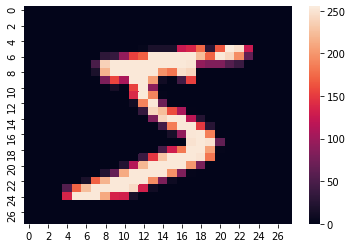

In [64]:
sns.heatmap(X_pretty[0])

Also note the range of X. The plot above already gives a hint that its values range from 0 to somewhere in the 250s and that higher values represent ink marks. A closer look reveils that the actual range is [0, 255]. This is important to keep in mind.

In [65]:
print(f'Distinct values of X: {np.unique(X)}')

Distinct values of X: [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192.

#### Data Preparation

For technical reasons that have to do with how exactly machine learning models learn, it is better to scale down the values of X, so that they fall into the interval [0, 1]. We achieve this by dividing each entry by 255, the maximum value of X.

In [66]:
X_scaled = X / 255
print(f'Shape of X_scaled: {X_scaled.shape}')
print(f'Distinct values of X_scaled: {np.unique(X_scaled)}')

Shape of X_scaled: (70000, 784)
Distinct values of X_scaled: [0.         0.00392157 0.00784314 0.01176471 0.01568627 0.01960784
 0.02352941 0.02745098 0.03137255 0.03529412 0.03921569 0.04313725
 0.04705882 0.05098039 0.05490196 0.05882353 0.0627451  0.06666667
 0.07058824 0.0745098  0.07843137 0.08235294 0.08627451 0.09019608
 0.09411765 0.09803922 0.10196078 0.10588235 0.10980392 0.11372549
 0.11764706 0.12156863 0.1254902  0.12941176 0.13333333 0.1372549
 0.14117647 0.14509804 0.14901961 0.15294118 0.15686275 0.16078431
 0.16470588 0.16862745 0.17254902 0.17647059 0.18039216 0.18431373
 0.18823529 0.19215686 0.19607843 0.2        0.20392157 0.20784314
 0.21176471 0.21568627 0.21960784 0.22352941 0.22745098 0.23137255
 0.23529412 0.23921569 0.24313725 0.24705882 0.25098039 0.25490196
 0.25882353 0.2627451  0.26666667 0.27058824 0.2745098  0.27843137
 0.28235294 0.28627451 0.29019608 0.29411765 0.29803922 0.30196078
 0.30588235 0.30980392 0.31372549 0.31764706 0.32156863 0.3254902
 0.

Finally we split our data into two parts: One that we use to train our model and another, disjoint one, that we will later use to evaluate its performance.

A lot can go wrong in this step. But for now we won't worry about the details. After all, this is only meant to be a quick demo, not a project meant to ever go into production.

In [0]:
X_train, y_train = X_scaled[:60000], y[:60000]
X_test, y_test = X_scaled[60000:], y[60000:]

#### Model Design

Next we design a model to be trained on our prepared data. Experience tells me that a so-called SVM Classifier will work pretty good here, while also being easy to create and train. So let's go with that for now.

There are a lot you can configure about this model, but here we will keep it very simple and go with the defaults.

In [0]:
from sklearn.svm import LinearSVC

svm_classifier = LinearSVC()

#### Model Training

Next we have to train our model. Thanks to Sklearn this is a easy as calling

In [69]:
svm_classifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

We will later see that there's a lot going on the the background to make this happen. But for now let's just enjoy the fruits of our labour.

#### Model Evaluation

Supposively, our model has now learned to recognize digits from images. But how can we know whether that's actually true?

First, we can see whether it actually gets the images in the training set right. To do so, we can manually compare some instances:

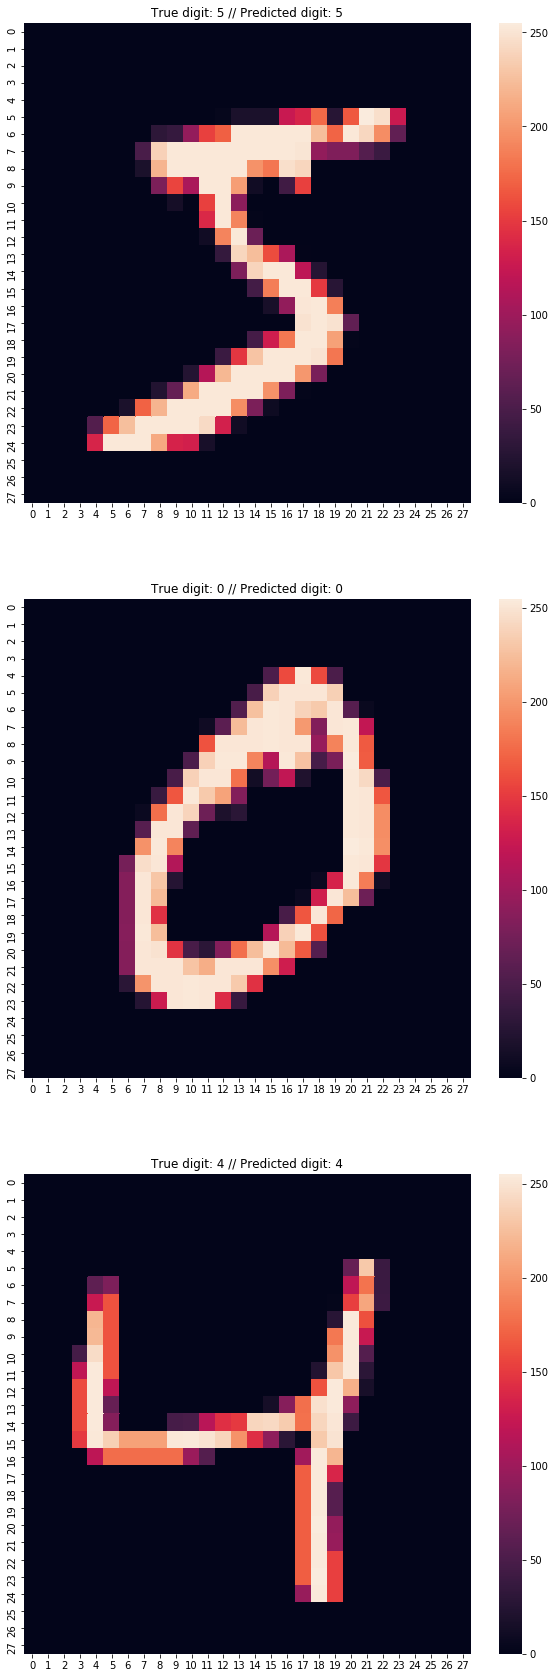

In [70]:
fig, axs = plt.subplots(nrows=3, figsize=(10,30))
for i in range(0, 3):
    true_digit = y_train[i]
    predicted_digit = svm_classifier.predict(X_train[i].reshape(1,-1))[0]
    sns.heatmap(X_pretty[i], ax=axs[i]).set_title(f'True digit: {true_digit} // Predicted digit: {predicted_digit}')



It got all of these right, great!

But clearly we can't manually inspect 60000 entries. What we need is a metric to tell us how well our model learned from its training set:

In [71]:
y_predicted_train = svm_classifier.predict(X_train)
accuracy_train = sklearn.metrics.accuracy_score(y_train, y_predicted_train)

print(f'The accuracy of svm_classifier on the training set is: {accuracy_train}')

The accuracy of svm_classifier on the training set is: 0.9262166666666667


So our model identifies 92.6% of its training samples correctly. That's pretty good.

But, unfortunately, that's not all there is to the story. Since we created this metric from data the model had seen during training, this value is overly optimistic. What we really want to now is how well we should the model expect to perform on new data -- data it has never seen before.

That's exactly why we've held back X_test, y_test. Let's check how well svm_classifier performs on the new data:

In [72]:
y_predicted_test = svm_classifier.predict(X_test)
accuracy_test = sklearn.metrics.accuracy_score(y_test, y_predicted_test)

print(f'The accuracy of svm_classifier on the test set is: {accuracy_test}')

The accuracy of svm_classifier on the test set is: 0.9183


91.8% accuracy on the test set. As expected, it is a bit lower than the performance on the training set led us to believe. But, in this case, they're pretty close. Which tells us two things:

1. A high accuracy during training shows us that the model was able to learn how to perform the OCR task at all.
2. A high accuracy during testing gives us some level of confidence that it will be able to handle previously unseen data as well -- as long as it is sufficiently similar to the data encountered during testing.

#### Bonus

To demonstrate this last point, I've asked two colleagues to write down digits on a piece of paper and we will now see whether our model is able to recognize them as well:

#### Get Custom MNIST Data

X_custom[0] = [0.07712418 0.07712418 0.07843137 0.07843137 0.07843137 0.07843137
 0.08104575 0.06405229 0.06928105 0.07712418 0.0627451  0.07058824
 0.07320261 0.06797386 0.06928105 0.06797386 0.06535948 0.06928105
 0.06928105 0.07189542 0.0745098  0.07058824 0.07058824 0.07058824
 0.07058824 0.07058824 0.07058824 0.07058824 0.07712418 0.07712418
 0.07843137 0.07843137 0.07843137 0.07712418 0.07320261 0.07058824
 0.0745098  0.06928105 0.08104575 0.06405229 0.07189542 0.07189542
 0.07843137 0.08496732 0.06797386 0.06143791 0.06535948 0.06535948
 0.07058824 0.07058824 0.07058824 0.07058824 0.07058824 0.07058824
 0.07058824 0.07058824 0.07712418 0.07712418 0.07843137 0.07843137
 0.07843137 0.07712418 0.07843137 0.07320261 0.06928105 0.05490196
 0.03660131 0.02875817 0.02875817 0.01699346 0.02091503 0.07189542
 0.07581699 0.07320261 0.07581699 0.07712418 0.08235294 0.07581699
 0.07058824 0.07058824 0.07058824 0.07058824 0.07058824 0.07058824
 0.07712418 0.07712418 0.07712418 0.07712418 0.0

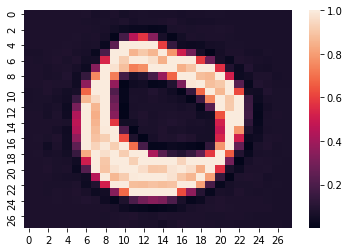

In [113]:
from skimage import io

def read_image(url: str) -> np.array:
    """
    Read image from url and return it in MNIST format.
    """
    image = io.imread(url)
    return np.reshape((255 - np.mean(np.array(image)[:,:,:3], axis=2)) / 255, newshape=(28*28))

urls = []
X_custom, y_custom = [], []

for prefix in ['a', 'l']:
    for digit in range(0, 10):
        url = f'https://raw.githubusercontent.com/KappaDistributive/Practical-Data-Science/master/datasets/mnist_custom/{prefix}_{digit}.png'
        X_custom.append(read_image(url))
        y_custom.append(str(digit))
X_custom, y_custom  = np.array(X_custom), np.array(y_custom)
print(f'X_custom[0] = {X_custom[0]}')
sns.heatmap(np.reshape(X_custom[0], newshape=(28,28)))

Let's repeat the assume evaluation of our model as before but this time with our custom digits:

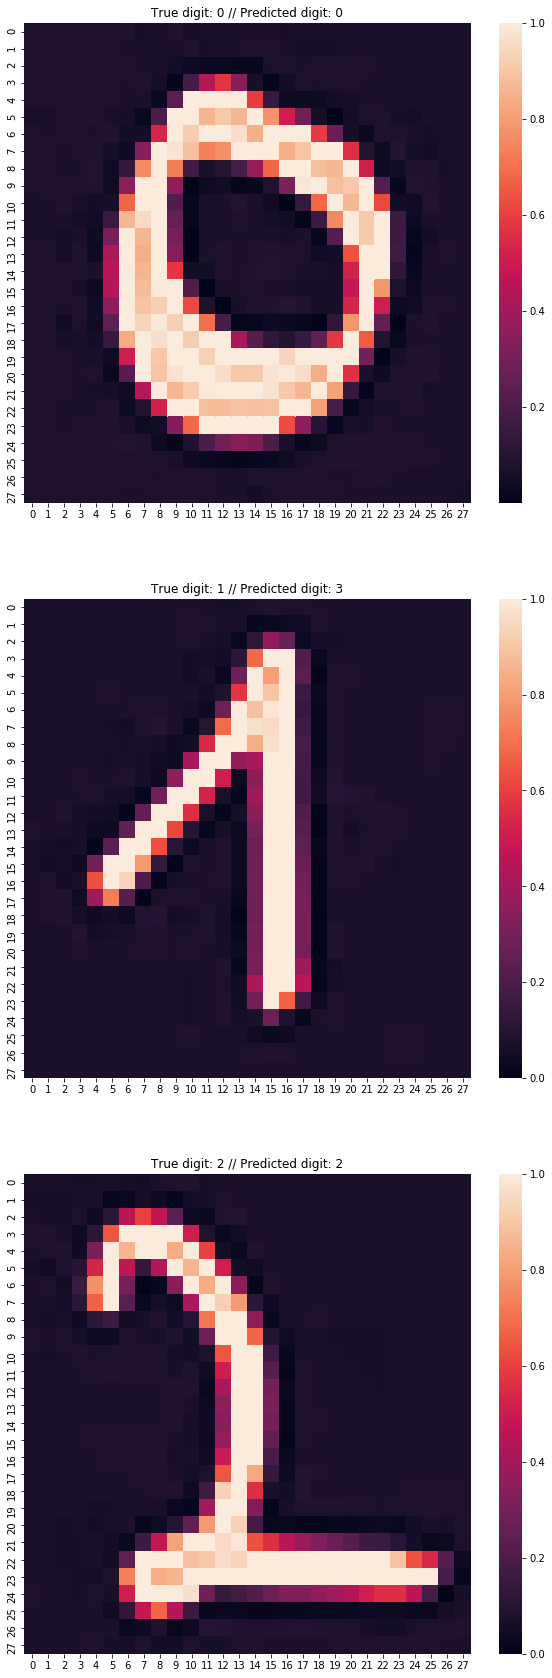

In [114]:
fig, axs = plt.subplots(nrows=3, figsize=(10,30))
for i in range(0, 3):
    true_digit = y_custom[i]
    predicted_digit = svm_classifier.predict(X_custom[i].reshape(1,-1))[0]
    sns.heatmap(np.reshape(X_custom[i], newshape=(28,28)), ax=axs[i]).set_title(f'True digit: {true_digit} // Predicted digit: {predicted_digit}')

y_predicted_custom = svm_classifier.predict(X_custom)


In [115]:
y_predicted_custom = svm_classifier.predict(X_custom)

print(y_custom)
print(y_predicted_custom)

accuracy_custom = sklearn.metrics.accuracy_score(y_custom, y_predicted_custom)

print(f'Accuracy of svm_classifier on custom set: {accuracy_custom}')


['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '0' '1' '2' '3' '4' '5' '6' '7'
 '8' '9']
['0' '3' '2' '3' '7' '7' '3' '6' '5' '7' '3' '5' '2' '3' '2' '8' '2' '2'
 '8' '3']
Accuracy of svm_classifier on custom set: 0.3


The accuracy dropped down all the way to 30%. That's terrible (but not surprising)!

Remember this: It is entirely possible for a machine learning model to do well during training (, evaluation) and testing, yet fail to generalize well to the kind of data it might see in production.

There are various techniques to account for this but that's a topic for another time.

To end our first session, let's look at a few machine learning applications in the wild.

1. Talking to Transformer
    > https://talktotransformer.com
2. This Person Does Not Exist
    > https://www.thispersondoesnotexist.com
3. AutoDraw
    > https://www.autodraw.com
4. Fast Neural Style
    > *SEIZURE WARNING*: The following demonstration involves rapidly flashing images.
    >
    > https://tenso.rs/demos/fast-neural-style/